# All Vector data

In [1]:
import os
from os import walk
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
from scipy import signal
import math

from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter1d
from scipy.signal import butter, filtfilt
import h5netcdf
import xarray as xr
import matplotlib.dates as mdates
import matplotlib.mlab as mlab
from scipy.signal. windows import hann
from pyfftw.interfaces import scipy_fftpack as fftw
import pyrsktools
from scipy.integrate import cumulative_trapezoid as cumtrapz
from scipy.ndimage import gaussian_filter1d

import dolfyn as dlfn 
from dolfyn.adv import api

%config InlineBackend.figure_formats = ['svg']
# from utils import *

# November data 

In [2]:
os.chdir(r'/Users/liav/Desktop/Jupyter/01_OTI_Data_2024/Vectors/Data')
gutter1 = xr.open_dataset("GUTTER1_15_18_Nov.nc")
gutter1

<xarray.Dataset>
Dimensions:              (beam: 3, x*: 3, time: 820799, dir: 3, earth: 3,
                          inst: 3)
Coordinates:
  * beam                 (beam) int64 1 2 3
  * x*                   (x*) int64 1 2 3
  * time                 (time) datetime64[ns] 2024-11-15T18:00:00.249937296 ...
  * dir                  (dir) object 'X' 'Y' 'Z'
  * earth                (earth) object 'E' 'N' 'U'
  * inst                 (inst) object 'X' 'Y' 'Z'
Data variables: (12/16)
    beam2inst_orientmat  (beam, x*) float64 ...
    batt                 (time) float32 ...
    c_sound              (time) float32 ...
    heading              (time) float32 ...
    pitch                (time) float32 ...
    roll                 (time) float32 ...
    ...                   ...
    amp                  (dir, time) uint8 ...
    corr                 (dir, time) uint8 ...
    orientation_down     (time) bool ...
    pressure             (time) float64 ...
    orientmat            (earth, inst, time) float32 ...
    depth                (time) float64 ...
Attributes:
    config:             Gutter
    inst_make:          Nortek
    inst_model:         Vector
    inst_type:          ADV
    rotate_vars:        vel
    freq:               6000
    SerialNum:          VEC13063
    Comments:           Gutter near T1 & T2 (Liav, Kate & Saanvi)
    fs:                 4.0
    coord_sys:          inst
    has_imu:            0
    principal_heading:  93.2881

In [3]:
os.chdir(r'/Users/liav/Desktop/Jupyter/01_OTI_Data_2024/Vectors/Data')
gutter2 = xr.open_dataset("GUTTER2_19_22_Nov.nc")
gutter2

<xarray.Dataset>
Dimensions:              (beam: 3, x*: 3, time: 676799, dir: 3, earth: 3,
                          inst: 3)
Coordinates:
  * beam                 (beam) int64 1 2 3
  * x*                   (x*) int64 1 2 3
  * time                 (time) datetime64[ns] 2024-11-19T21:00:00.249991894 ...
  * dir                  (dir) object 'X' 'Y' 'Z'
  * earth                (earth) object 'E' 'N' 'U'
  * inst                 (inst) object 'X' 'Y' 'Z'
Data variables: (12/16)
    beam2inst_orientmat  (beam, x*) float64 ...
    batt                 (time) float32 ...
    c_sound              (time) float32 ...
    heading              (time) float32 ...
    pitch                (time) float32 ...
    roll                 (time) float32 ...
    ...                   ...
    amp                  (dir, time) uint8 ...
    corr                 (dir, time) uint8 ...
    orientation_down     (time) bool ...
    pressure             (time) float64 ...
    orientmat            (earth, inst, time) float32 ...
    depth                (time) float64 ...
Attributes:
    config:             Guter2
    inst_make:          Nortek
    inst_model:         Vector
    inst_type:          ADV
    rotate_vars:        vel
    freq:               6000
    SerialNum:          VEC13063
    Comments:           Second deployment in the gutter at the same location
    fs:                 4.0
    coord_sys:          inst
    has_imu:            0
    principal_heading:  72.9414

In [4]:
os.chdir(r'/Users/liav/Desktop/Jupyter/01_OTI_Data_2024/Vectors/Data')
gutter3 = xr.open_dataset("GUTTER3_23_26_11.nc")
gutter3

<xarray.Dataset>
Dimensions:              (beam: 3, x*: 3, time: 777599, dir: 3, earth: 3,
                          inst: 3)
Coordinates:
  * beam                 (beam) int64 1 2 3
  * x*                   (x*) int64 1 2 3
  * time                 (time) datetime64[ns] 2024-11-23T21:00:00.249994516 ...
  * dir                  (dir) object 'X' 'Y' 'Z'
  * earth                (earth) object 'E' 'N' 'U'
  * inst                 (inst) object 'X' 'Y' 'Z'
Data variables: (12/16)
    beam2inst_orientmat  (beam, x*) float64 ...
    batt                 (time) float32 ...
    c_sound              (time) float32 ...
    heading              (time) float32 ...
    pitch                (time) float32 ...
    roll                 (time) float32 ...
    ...                   ...
    amp                  (dir, time) uint8 ...
    corr                 (dir, time) uint8 ...
    orientation_down     (time) bool ...
    pressure             (time) float64 ...
    orientmat            (earth, inst, time) float32 ...
    depth                (time) float64 ...
Attributes:
    config:             GUTER3
    inst_make:          Nortek
    inst_model:         Vector
    inst_type:          ADV
    rotate_vars:        vel
    freq:               6000
    SerialNum:          VEC13063
    Comments:           3rd deployment in the Gutter, same location as previo...
    fs:                 4.0
    coord_sys:          inst
    has_imu:            0
    principal_heading:  131.1382

In [5]:
os.chdir(r'/Users/liav/Desktop/Jupyter/01_OTI_Data_2024/Vectors/Data')
sa1 = xr.open_dataset("SA1_15_21_Nov.nc")
sa1

<xarray.Dataset>
Dimensions:              (beam: 3, x*: 3, time: 1468801, dir: 3, earth: 3,
                          inst: 3)
Coordinates:
  * beam                 (beam) int64 1 2 3
  * x*                   (x*) int64 1 2 3
  * time                 (time) datetime64[ns] 2024-11-16T01:00:00.000006437 ...
  * dir                  (dir) object 'X' 'Y' 'Z'
  * earth                (earth) object 'E' 'N' 'U'
  * inst                 (inst) object 'X' 'Y' 'Z'
Data variables: (12/16)
    beam2inst_orientmat  (beam, x*) float64 ...
    batt                 (time) float32 ...
    c_sound              (time) float32 ...
    heading              (time) float32 ...
    pitch                (time) float32 ...
    roll                 (time) float32 ...
    ...                   ...
    amp                  (dir, time) uint8 ...
    corr                 (dir, time) uint8 ...
    orientation_down     (time) bool ...
    pressure             (time) float64 ...
    orientmat            (earth, inst, time) float32 ...
    depth                (time) float64 ...
Attributes:
    config:             SA
    inst_make:          Nortek
    inst_model:         Vector
    inst_type:          ADV
    rotate_vars:        vel
    freq:               6000
    SerialNum:          VEC13240
    Comments:           SA between T3 T4, deployed by Liav & Kate & Lachie
    fs:                 4.0
    coord_sys:          inst
    has_imu:            0
    principal_heading:  50.2829

In [6]:
os.chdir(r'/Users/liav/Desktop/Jupyter/01_OTI_Data_2024/Vectors/Data')
sa2 = xr.open_dataset("SA1_23_26_Nov.nc")
sa2

<xarray.Dataset>
Dimensions:              (beam: 3, x*: 3, time: 1036799, dir: 3, earth: 3,
                          inst: 3)
Coordinates:
  * beam                 (beam) int64 1 2 3
  * x*                   (x*) int64 1 2 3
  * time                 (time) datetime64[ns] 2024-11-23T01:00:00.245420218 ...
  * dir                  (dir) object 'X' 'Y' 'Z'
  * earth                (earth) object 'E' 'N' 'U'
  * inst                 (inst) object 'X' 'Y' 'Z'
Data variables: (12/16)
    beam2inst_orientmat  (beam, x*) float64 ...
    batt                 (time) float32 ...
    c_sound              (time) float32 ...
    heading              (time) float32 ...
    pitch                (time) float32 ...
    roll                 (time) float32 ...
    ...                   ...
    amp                  (dir, time) uint8 ...
    corr                 (dir, time) uint8 ...
    orientation_down     (time) bool ...
    pressure             (time) float64 ...
    orientmat            (earth, inst, time) float32 ...
    depth                (time) float64 ...
Attributes:
    config:             SA_2nd
    inst_make:          Nortek
    inst_model:         Vector
    inst_type:          ADV
    rotate_vars:        vel
    freq:               6000
    SerialNum:          VEC13240
    Comments:           2nd deployment in SA: 23/11 for 3 days, used battery ...
    fs:                 4.0
    coord_sys:          inst
    has_imu:            0
    principal_heading:  76.9824

# Feather Plots

# Gutter 

In [10]:
# combining the 3 gutter datasets:
#(concatenate along the time dimension)
combined = xr.concat([gutter1, gutter2, gutter3], dim='time')

# Extract X and Y velocity components
u = combined.vel.sel(dir='X')  # East-West velocity component
v = combined.vel.sel(dir='Y')  # North-South velocity component

# Resample to a desired frequency (e.g., hourly)
combined_resampled = combined.resample(time="1H").mean()  # Resample to hourly intervals and take the mean

/opt/anaconda3/envs/vector/lib/python3.10/site-packages/xarray/core/groupby.py:508: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index_grouper = pd.Grouper(


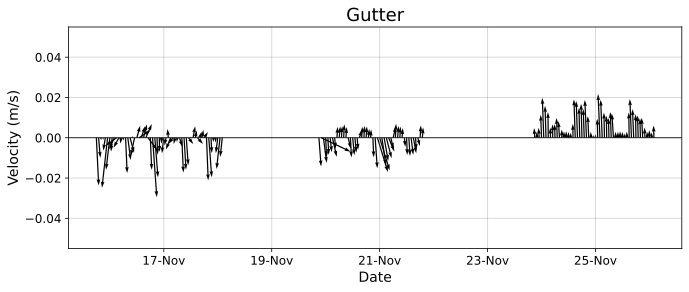

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Extract velocity components for X and Y directions
u_inst = combined_resampled['vel'].sel(dir='X').values  # Original instrument X
v_inst = combined_resampled['vel'].sel(dir='Y').values  # Original instrument Y

# # Convert degrees to radians (rotation of 120 degrees)
# theta = np.radians(130)

# # Apply 2D rotation matrix
# u_rot = u_inst * np.cos(theta) - v_inst * np.sin(theta)  # True eastward component
# v_rot = u_inst * np.sin(theta) + v_inst * np.cos(theta)  # True northward component

# Create a time index for plotting
time_resampled = combined_resampled['time'].values  # Use actual datetime for x-axis

# Centered Y-axis for the quiver plot
Y = np.zeros(len(time_resampled))

# Plot the feather diagram for both components
plt.figure(figsize=(11, 4))
plt.quiver(time_resampled, Y, u_inst, v_inst, scale=0.6, angles='xy', color='black', width=0.002)  # Use blue for visibility

# Formatting
plt.axhline(0, color='black', linewidth=0.8)  # Center Y-axis
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Velocity (m/s)', fontsize = 14)
plt.title('Gutter', fontsize = 18)

# Make the grid lines more transparent
plt.grid(color='grey', linestyle='-', linewidth=1, alpha=0.3)

# x-axis formatting
ax = plt.gca()  # Get the current axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))  # Format dates as 'day-month'
ax.xaxis.set_major_locator(mdates.AutoDateLocator())  # Automatically locate major ticks
ax.tick_params(axis='x', rotation=0)  # Rotate x-axis labels for readability
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

# Save the plot in the desired directory
save_dir = '/Users/liav/Desktop/4 Honours/05_Results/Vectors/Feather'  # Change this to your desired directory
os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist
file_name = 'gutter_feather_plot.png'
plt.savefig(os.path.join(save_dir, file_name), dpi=300, bbox_inches='tight')


# Show plot
plt.show()


# SA

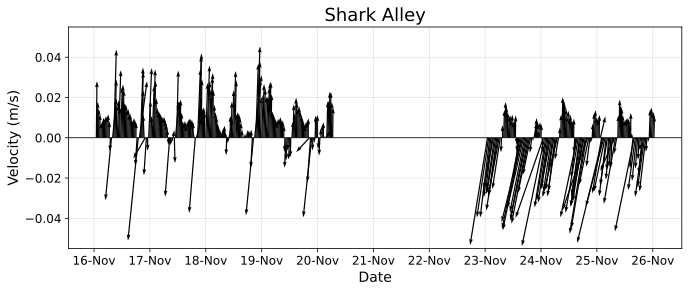

In [12]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Combine datasets along the time dimension
combined_sa = xr.concat([sa1, sa2], dim='time')

# Resample velocity data to 30-minute intervals
sa_resampled = combined_sa.resample(time="30min").mean()

# Extract velocity components for X and Y directions
u_inst = sa_resampled['vel'].sel(dir='X').values  # X component
v_inst = sa_resampled['vel'].sel(dir='Y').values  # Y component
time_resampled_sa = sa_resampled['time'].values  # Time for plotting

# Centered Y-axis for quiver plot
Y = np.zeros(len(time_resampled_sa))

# Plot the feather diagram with smaller arrow width
plt.figure(figsize=(11, 4))
plt.quiver(time_resampled_sa, Y, u_inst, v_inst, scale=0.6, angles='xy', color='black', width=0.002)

# Formatting
plt.axhline(0, color='black', linewidth=0.8)  # Center Y-axis
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Velocity (m/s)', fontsize = 14)
plt.title('Shark Alley', fontsize = 18)
plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.3)  # Adjust alpha for transparency
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)


# x-axis formatting
ax = plt.gca()  # Get the current axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))  # Format dates as 'day-month'
ax.xaxis.set_major_locator(mdates.AutoDateLocator())  # Automatically locate major ticks
ax.tick_params(axis='x', rotation=0)  # Rotate x-axis labels for readability

# Save the plot in the desired directory
save_dir = '/Users/liav/Desktop/4 Honours/05_Results/Vectors/Feather'  # Change this to your desired directory
os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist
file_name = 'SA_feather_plot.png'
plt.savefig(os.path.join(save_dir, file_name), dpi=300, bbox_inches='tight')

plt.show()


# Tides

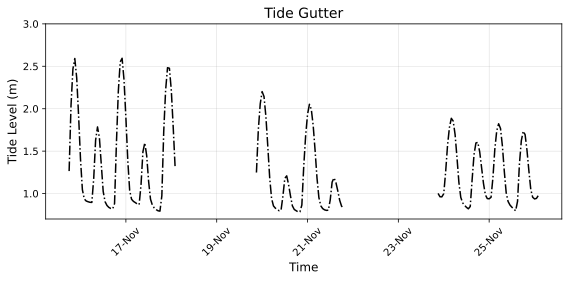

In [13]:
# Plot Pressure over time

# Create figure
fig, ax = plt.subplots(figsize=(8, 4))

# Plot tide level over time
ax.plot(time_resampled, combined_resampled.pressure, linestyle='-.', lw=1.5, color="black")

# Formatting
ax.set_ylabel('Tide Level (m)', fontsize=12, color='black')
ax.set_xlabel('Time', fontsize=12)


# Format the x-axis to show only day-month format without the year (e.g., 17-Nov)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))  # Day-Month format (e.g., 17-Nov)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=45)  # Rotate for better readability

# Title and grid
plt.title('Tide Gutter', fontsize=14)
plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.3)  # Adjust alpha for transparency
# plt.legend()
plt.ylim(0.7,3)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

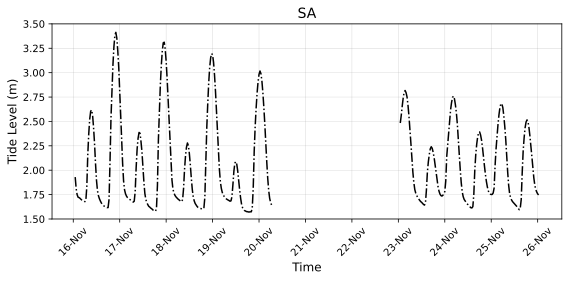

In [14]:
# Plot Pressure over time

# Create figure
fig, ax = plt.subplots(figsize=(8, 4))

# Plot tide level over time
ax.plot(time_resampled_sa, sa_resampled.pressure, linestyle='-.', lw=1.5, color="black")

# Formatting
ax.set_ylabel('Tide Level (m)', fontsize=12, color='black')
ax.set_xlabel('Time', fontsize=12)


# Format the x-axis to show only day-month format without the year (e.g., 17-Nov)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))  # Day-Month format (e.g., 17-Nov)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=45)  # Rotate for better readability

# Title and grid
plt.title('SA', fontsize=14)
plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.3)  # Adjust alpha for transparency
# plt.legend()
plt.ylim(1.5,3.5)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Tide & feather

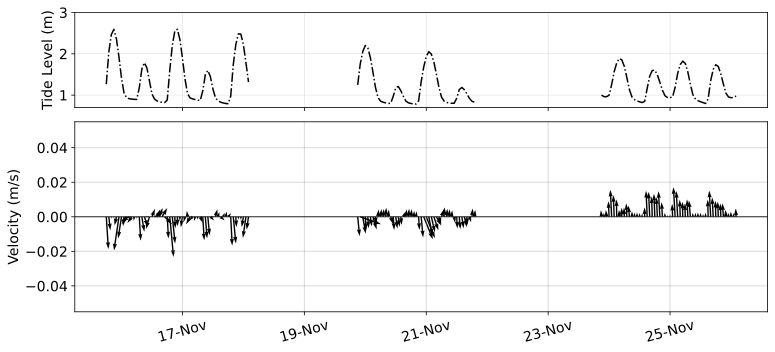

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# Set font size variable for easy adjustments
font_size = 14  

# Extract velocity components for X and Y directions
u_inst = combined_resampled['vel'].sel(dir='X').values  # Original instrument X
v_inst = combined_resampled['vel'].sel(dir='Y').values  # Original instrument Y

# Create a time index for plotting
time_resampled = combined_resampled['time'].values  # Use actual datetime for x-axis

# Centered Y-axis for the quiver plot
Y = np.zeros(len(time_resampled))

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 5), sharex=True, gridspec_kw={'height_ratios': [1, 2]})

# --- Top Plot: Tide Level ---
ax1.plot(time_resampled, combined_resampled.pressure, linestyle='-.', lw=1.5, color="black")
ax1.set_ylabel('Tide Level (m)', fontsize=font_size, color='black')
# ax1.set_title('Tide Gutter', fontsize=font_size+2)
ax1.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.3)
ax1.set_ylim(0.7, 3)
ax1.tick_params(axis='both', labelsize=font_size)

# --- Bottom Plot: Feather Diagram (Quiver) ---
ax2.quiver(time_resampled, Y, u_inst, v_inst, scale=1, angles='xy', color='black', width=0.002)
ax2.axhline(0, color='black', linewidth=0.8)  # Center Y-axis
ax2.set_ylabel('Velocity (m/s)', fontsize=font_size)
# ax2.set_title('Gutter Velocity Vectors', fontsize=font_size+2)
ax2.grid(color='grey', linestyle='-', linewidth=1, alpha=0.3)
ax2.tick_params(axis='both', labelsize=font_size)

# x-axis formatting for both subplots
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))  # Format dates as 'day-month'
ax2.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=15, fontsize=font_size)

# Adjust layout to prevent overlap
plt.tight_layout()

# --- Save the plot in the desired directory ---
save_dir = '/Users/liav/Desktop/4 Honours/05_Results/Vectors/Feather'  # Change this to your desired directory
os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist
file_name = 'gutter_combined_plot.png'
plt.savefig(os.path.join(save_dir, file_name), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


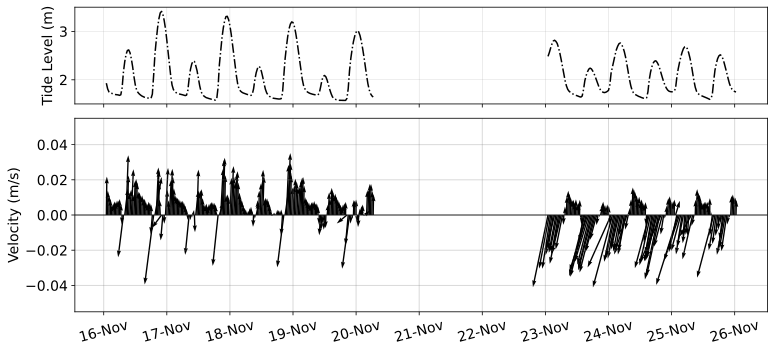

In [16]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# Set font size variable for easy adjustments
font_size = 14  

# Combine datasets along the time dimension
combined_sa = xr.concat([sa1, sa2], dim='time')

# Resample velocity data to 30-minute intervals
sa_resampled = combined_sa.resample(time="30min").mean()

# Extract velocity components for X and Y directions
u_inst = sa_resampled['vel'].sel(dir='X').values  # X component
v_inst = sa_resampled['vel'].sel(dir='Y').values  # Y component
time_resampled_sa = sa_resampled['time'].values  # Time for plotting

# Centered Y-axis for the quiver plot
Y = np.zeros(len(time_resampled_sa))

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 5), sharex=True, gridspec_kw={'height_ratios': [1, 2]})

# --- Top Plot: Tide Level ---
ax1.plot(time_resampled_sa, sa_resampled.pressure, linestyle='-.', lw=1.5, color="black")
ax1.set_ylabel('Tide Level (m)', fontsize=font_size, color='black')
# ax1.set_title('SA Tide Level', fontsize=font_size+2)  # Optional title
ax1.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.3)
ax1.set_ylim(1.5, 3.5)
ax1.tick_params(axis='both', labelsize=font_size)

# --- Bottom Plot: Feather Diagram (Quiver) ---
ax2.quiver(time_resampled_sa, Y, u_inst, v_inst, scale=1, angles='xy', color='black', width=0.002)
ax2.axhline(0, color='black', linewidth=0.8)  # Center Y-axis
ax2.set_ylabel('Velocity (m/s)', fontsize=font_size)
# ax2.set_title('SA Velocity Vectors', fontsize=font_size+2)  # Optional title
ax2.grid(color='grey', linestyle='-', linewidth=1, alpha=0.3)
ax2.tick_params(axis='both', labelsize=font_size)

# x-axis formatting for both subplots
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))  # Format dates as 'day-month'
ax2.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=15, fontsize=font_size)

# Adjust layout to prevent overlap
plt.tight_layout()

# --- Save the plot in the desired directory ---
save_dir = '/Users/liav/Desktop/4 Honours/05_Results/Vectors/Feather'  # Change this to your desired directory
os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist
file_name = 'SA_combined_plot.png'
plt.savefig(os.path.join(save_dir, file_name), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


## clipping so datasets have same start/end time

In [17]:
# Define the common start and end times
start_time = np.datetime64('2024-11-16T01:00:00')
end_time = np.datetime64('2024-11-26T00:30:00')

# Clip the 'combined_resampled' dataset
combined_resampled_clipped = combined_resampled.sel(time=slice(start_time, end_time))

# Clip the 'combined_sa' dataset
combined_sa_clipped = combined_sa.sel(time=slice(start_time, end_time))

# Now, both datasets have the same time range


## re-plotting

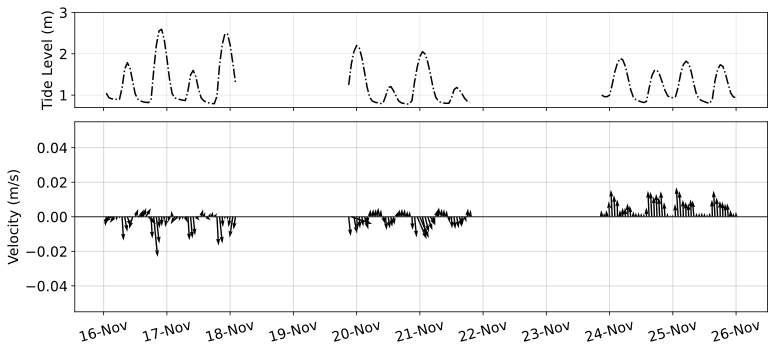

In [18]:
# Set font size variable for easy adjustments
font_size = 14  

# Extract velocity components for X and Y directions
u_inst = combined_resampled_clipped['vel'].sel(dir='X').values  # Original instrument X
v_inst = combined_resampled_clipped['vel'].sel(dir='Y').values  # Original instrument Y

# Create a time index for plotting
time_resampled_clip = combined_resampled_clipped['time'].values  # Use actual datetime for x-axis

# Centered Y-axis for the quiver plot
Y = np.zeros(len(time_resampled_clip))

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 5), sharex=True, gridspec_kw={'height_ratios': [1, 2]})

# --- Top Plot: Tide Level ---
ax1.plot(time_resampled_clip, combined_resampled_clipped.pressure, linestyle='-.', lw=1.5, color="black")
ax1.set_ylabel('Tide Level (m)', fontsize=font_size, color='black')
ax1.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.3)
ax1.set_ylim(0.7, 3)
ax1.tick_params(axis='both', labelsize=font_size)

# --- Bottom Plot: Feather Diagram (Quiver) ---
ax2.quiver(time_resampled_clip, Y, u_inst, v_inst, scale=1, angles='xy', color='black', width=0.002)
ax2.axhline(0, color='black', linewidth=0.8)  # Center Y-axis
ax2.set_ylabel('Velocity (m/s)', fontsize=font_size)
ax2.grid(color='grey', linestyle='-', linewidth=1, alpha=0.3)
ax2.tick_params(axis='both', labelsize=font_size)

# x-axis formatting for both subplots
ax2.xaxis.set_major_locator(mdates.DayLocator())  # Change to DayLocator for daily ticks
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))  # Format dates as 'day-month'
plt.xticks(rotation=15, fontsize=font_size)

# Adjust layout to prevent overlap
plt.tight_layout()

# --- Save the plot in the desired directory ---
save_dir = '/Users/liav/Desktop/4 Honours/05_Results/Vectors/Feather'  # Change this to your desired directory
os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist
file_name = 'gutter_combined_plot_clipped.png'
plt.savefig(os.path.join(save_dir, file_name), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


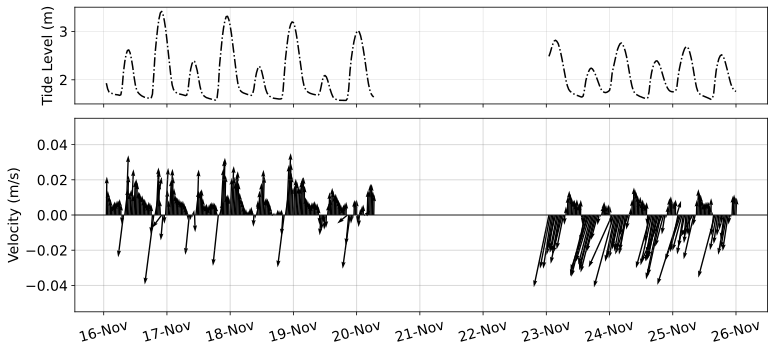

In [19]:
# Set font size variable for easy adjustments
font_size = 14  

# Resample velocity data to 30-minute intervals
sa_resampled_clip = combined_sa_clipped.resample(time="30min").mean()

# Extract velocity components for X and Y directions
u_inst = sa_resampled_clip['vel'].sel(dir='X').values  # X component
v_inst = sa_resampled_clip['vel'].sel(dir='Y').values  # Y component
time_resampled_sa_clip = sa_resampled_clip['time'].values  # Time for plotting

# Centered Y-axis for the quiver plot
Y = np.zeros(len(time_resampled_sa_clip))

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 5), sharex=True, gridspec_kw={'height_ratios': [1, 2]})

# --- Top Plot: Tide Level ---
ax1.plot(time_resampled_sa_clip, sa_resampled_clip.pressure, linestyle='-.', lw=1.5, color="black")
ax1.set_ylabel('Tide Level (m)', fontsize=font_size, color='black')
# ax1.set_title('SA Tide Level', fontsize=font_size+2)  # Optional title
ax1.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.3)
ax1.set_ylim(1.5, 3.5)
ax1.tick_params(axis='both', labelsize=font_size)

# --- Bottom Plot: Feather Diagram (Quiver) ---
ax2.quiver(time_resampled_sa_clip, Y, u_inst, v_inst, scale=1, angles='xy', color='black', width=0.002)
ax2.axhline(0, color='black', linewidth=0.8)  # Center Y-axis
ax2.set_ylabel('Velocity (m/s)', fontsize=font_size)
# ax2.set_title('SA Velocity Vectors', fontsize=font_size+2)  # Optional title
ax2.grid(color='grey', linestyle='-', linewidth=1, alpha=0.3)
ax2.tick_params(axis='both', labelsize=font_size)

# x-axis formatting for both subplots
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))  # Format dates as 'day-month'
ax2.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=15, fontsize=font_size)

# Adjust layout to prevent overlap
plt.tight_layout()

# --- Save the plot in the desired directory ---
save_dir = '/Users/liav/Desktop/4 Honours/05_Results/Vectors/Feather'  # Change this to your desired directory
os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist
file_name = 'SA_combined_plot_clipped.png'
plt.savefig(os.path.join(save_dir, file_name), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
